In [33]:
import torch
import torch.nn as nn
import torch.functional as F
from torchvision import transforms
import torchvision.utils as vutils
from torch.utils.data import random_split, DataLoader
import matplotlib.pyplot as plt

import numpy as np

import sys
base = "../../"
sys.path.append(base + "models")
from vqgan.vqgan import VQGAN
from vqgan.discriminator import Discriminator
from vqgan.perceptual_loss import LPIPS
sys.path.append(base + "datasets")
from pokedata import PokemonDataset

#### Parts needed
1. GAN w/ autoencoding generator
2. How to do vector quantization with pytorch - Done with codebook module!
3. transformer
4. Training loop

In [34]:
# Hyperparameters
batch_size = 128 # batch size
epochs = 50

# image 
im_size = 96    # input image h & w
im_c = 3        # number of color channels
# gan params
nz = 8      # latent dimension size, 16 used in literature, let's start with 8 and maybe go to 16
nz_c = 8  # total dimensions per vector in latent space
d_patches = 8   # h and w for patchgan discriminator output
nef = 64
ngf = 64
ndf = 64
# transformer params
sequence_length = nz ** 2
codebook_size = 512 # 8192 used in larger visual models, maybe try pushing up to 1024 or looking at 256?
beta = 0.1 # Verify, used for codebook

# loss params
lda = 100

# training params
lr=2e-5
beta1=0.5
beta2=0.9

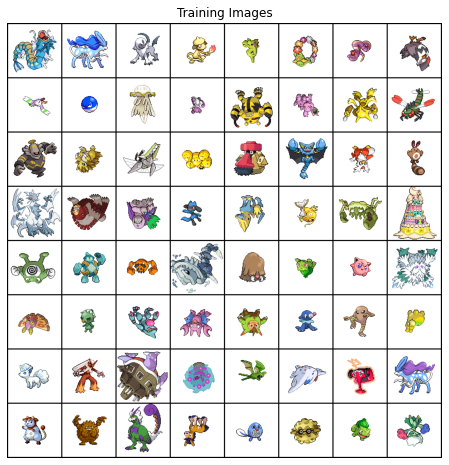

In [35]:
# load dataset
data_path = "../../data"
csv_path = data_path + "/data.csv"

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.RandomHorizontalFlip(),
                                transforms.RandomVerticalFlip(),
                                # transforms.ColorJitter(brightness=0.1, hue=0.1, 
                                #                        contrast=0.1, saturation=0.1),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                ])

# load data
dataset = PokemonDataset(csv_file=csv_path, root_dir=data_path, transform=transform, get_types=True)

dataloader = DataLoader(dataset, batch_size=batch_size, 
                          shuffle=True)

# pick data device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Plot some training images
real_batch = next(iter(dataloader))
im_batch = real_batch[0][:64].detach()
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

plt.show()

In [36]:
# ad hoc testing of G's components E+D
from vqgan.generator import Encoder, Generator

netE = Encoder()
netD = Generator()

x = torch.randn(128, 3, 96, 96)
z = netE(x)
x_hat = netD(z)

x.shape, z.shape, x_hat.shape


(torch.Size([128, 3, 96, 96]),
 torch.Size([128, 8, 8, 8]),
 torch.Size([128, 3, 96, 96]))

In [37]:
# attempt at writing a VQGAN training function
model_g = VQGAN(codebook_size=codebook_size, latent_dim=nz_c)
model_d = Discriminator()

g_optim = torch.optim.Adam(
    model_g.parameters(),
    # list(model_g.encoder.parameters()) +
    # list(model_g.decoder.parameters()) +
    # list(model_g.codebook.parameters()) +
    # list(model_g.proj_in.parameters()) +
    # list(model_g.proj_out.parameters()),
    lr=lr, eps=1e-08, betas=(beta1, beta2)
)

d_optim = torch.optim.Adam(
    model_d.parameters(),
    lr=lr, eps=1e-08, betas=(beta1, beta2)
)

TypeError: VQGAN.__init__() missing 2 required positional arguments: 'codebook_size' and 'latent_dim'

In [31]:


# preprocessing information
steps_per_epoch = len(dataloader)
print(steps_per_epoch)

optimizer = torch.optim.Adam()

for epoch in range(epochs):

    for i, data in enumerate(dataloader):
        # only training VQGAN

        # need:
        # 1. total loss = reconstruction loss + discriminator loss + quantization_loss
        # train until reconstruction looks good




SyntaxError: incomplete input (688016645.py, line 13)

In [32]:
im_batch.shape

torch.Size([64, 3, 96, 96])